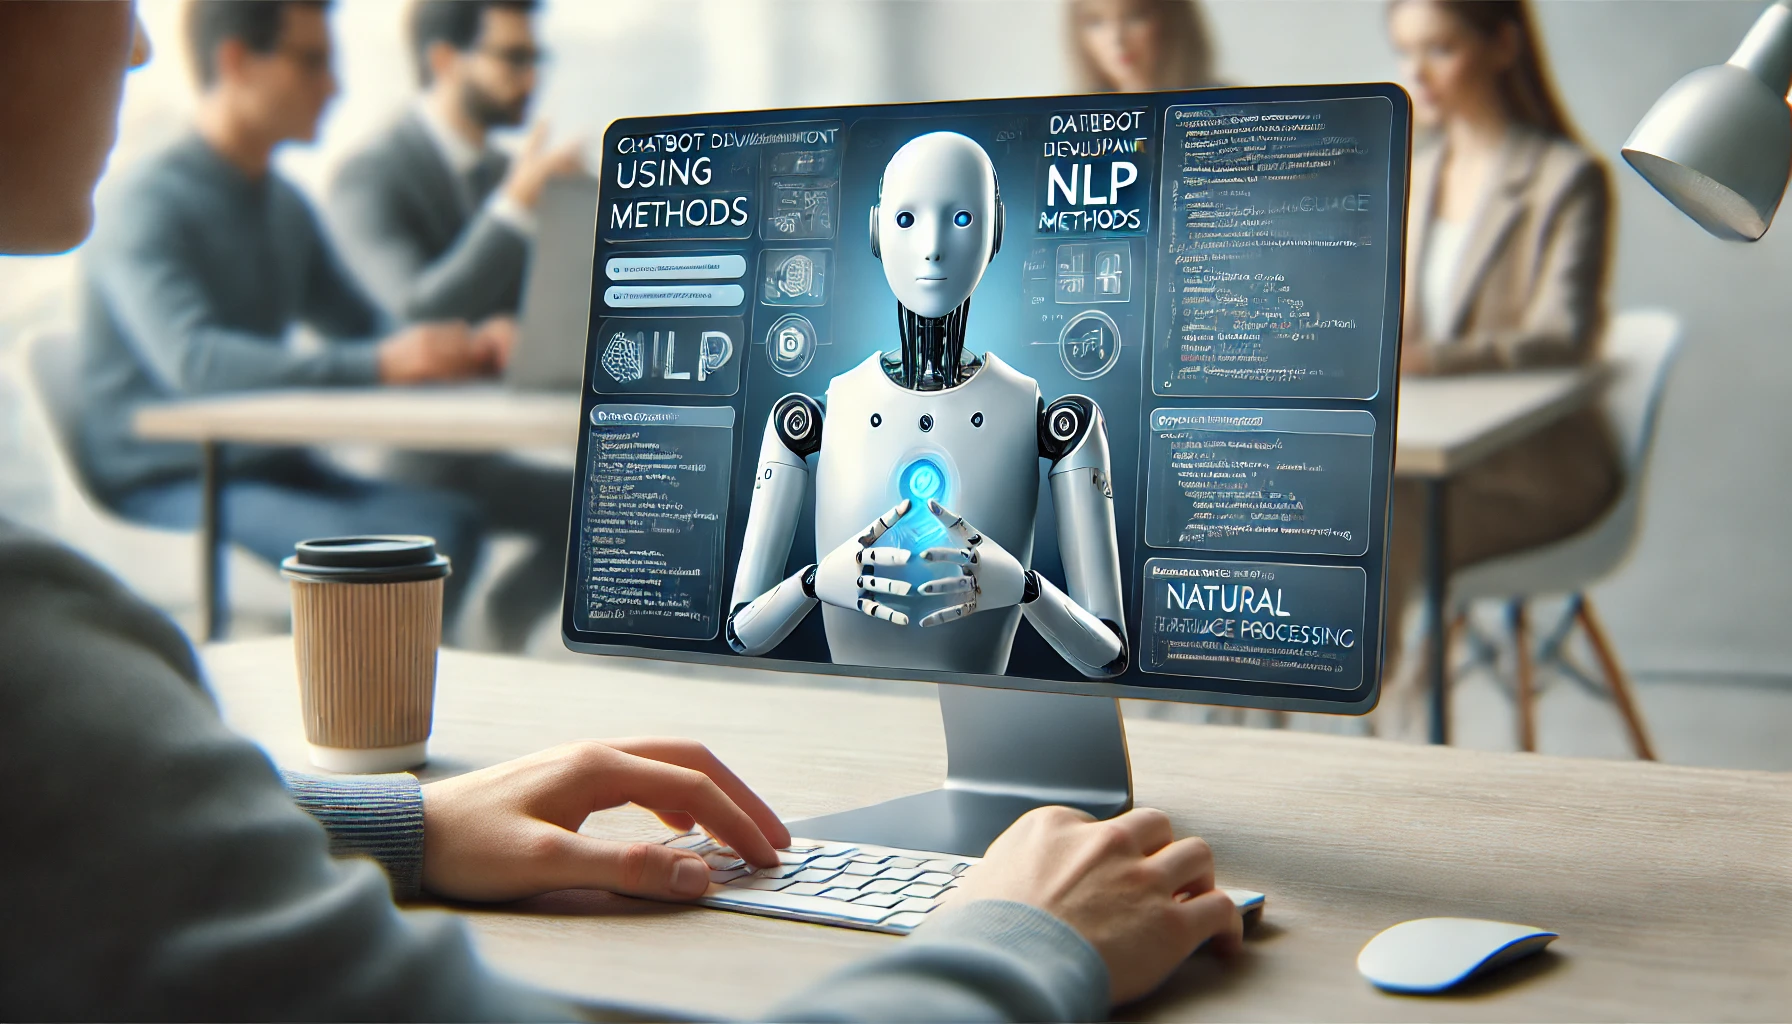

# Objective of the Project

Develop a chatbot that uses natural language processing techniques to engage in text-based conversations by responding to user inputs with
relevant information extracted from a provided text file.
*   The project preprocesses multiple .txt files using NLTK for text normalization.
*   The chatbot recognizes greetings with predefined responses and uses TF-IDF vectorizer with cosine similarity for complex queries. It operates interactively, responding to user inputs until `bye` is typed, and handles gratitude expressions gracefully.

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
import string
import re
import random
from datetime import datetime
import glob
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

# Accesing the Files from Github to Read

### Load and Preprocess the Data

In [ ]:
!git clone https://github.com/sdey96/Chatbot.git

Cloning into 'Chatbot'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 29 (delta 10), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (29/29), 467.63 KiB | 12.64 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
import os

path = '/content/Chatbot'

In [ ]:
file_paths = glob.glob(os.path.join(path, '*.txt'))

In [ ]:
raw_docs = []
for file_path in file_paths:
    with open(file_path, 'r', errors='ignore') as f:
        raw_docs.append(f.read().lower())

### Combining into a Single String

In [ ]:
combined_raw_doc = ' '.join(raw_docs)

In [ ]:
print(combined_raw_doc)

random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. for classification tasks, the output of the random forest is the class selected by most trees. for regression tasks, the mean or average prediction of the individual trees is returned.[1][2] random decision forests correct for decision trees' habit of overfitting to their training set.[3]: 587–588 

the first algorithm for random decision forests was created in 1995 by tin kam ho[1] using the random subspace method,[2] which, in ho's formulation, is a way to implement the "stochastic discrimination" approach to classification proposed by eugene kleinberg.[4][5][6]

an extension of the algorithm was developed by leo breiman[7] and adele cutler,[8] who registered[9] "random forests" as a trademark in 2006 (as of 2019, owned by minitab, inc.).[10] the extension combines breiman's "bagging" idea

# Tokenization and Lemmatization

In [ ]:
lemmatizer = nltk.stem.WordNetLemmatizer()
tokens = nltk.word_tokenize(combined_raw_doc)
punctuation_removal = dict((ord(punctuation), None) for punctuation in string.punctuation)

In [ ]:
def LemNormalize(text):
    return nltk.word_tokenize(re.sub(r'[^\w\s]', '', text.lower()))

### Store Sentences for Searching

In [ ]:
sent_tokens = nltk.sent_tokenize(combined_raw_doc)

# Greetings & Responses

In [ ]:
greetings = [
    "hello", "hi", "greetings", "sup", "what's up", "hey",
    "howdy", "good day", "yo", "hi there", "hiya"
]
greeting_responses = [
    "Hi there!", "Hey!", "*nods*", "Hello!", "Greetings!", "Hi!",
    "Howdy!", "Good day to you!", "Yo!", "Hi there!", "Hello, how can I help?"
]

In [ ]:
how_are_you_phrases = [
    "how are you", "how's it going", "how do you do", "how are things"
]
how_are_you_responses = [
    "I'm just a program, but I'm functioning as expected! How about you?",
    "I'm here to assist you! How can I help today?",
    "Doing well, thank you! What can I do for you today?",
    "All systems operational! How are you?"
]

In [ ]:
positive_responses = ["good", "all good", "well", "fine", "okay", "great"]

### Context to track the chatbot's last question

In [ ]:
context = {"last_question": None}

In [ ]:
'''
def extract_entities(text):
    words = word_tokenize(text)

    pos_tags = pos_tag(words)

    named_entities = ne_chunk(pos_tags, binary=False)


    entities = {"DATE": [], "NAMED_ENTITIES": []}


    date_pattern = r'\b(\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|\d{4})\b'


    dates = re.findall(date_pattern, text)
    entities["DATE"].extend(dates)


    for chunk in named_entities:
        if isinstance(chunk, Tree):
            entity_type = chunk.label()
            entity = " ".join(c[0] for c in chunk)

            if entity_type in ["GPE", "ORGANIZATION", "PERSON"]:
                entities["NAMED_ENTITIES"].append(entity)

    return entities
'''

### Simple Keyword-based Response Generation

In [ ]:
'''
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
'''

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
'''
def embed_text(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1)
'''

In [ ]:
'''
def find_best_response(user_response, corpus):
    user_embedding = embed_text(user_response)
    best_match = None
    highest_similarity = -1
    for sentence in corpus:
        sentence_embedding = embed_text(sentence)
        similarity = torch.cosine_similarity(user_embedding, sentence_embedding).item()
        if similarity > highest_similarity:
            highest_similarity = similarity
            best_match = sentence
    return best_match if best_match else "I'm sorry, I don't have the information you need."
'''

In [ ]:
'''
def classify_intent(user_input):
    intent_classifier = torch.load('intent_classifier.pth')
    intent = intent_classifier.predict([user_input])[0]
    return intent
'''

In [ ]:
'''
def query_knowledge_base(user_input):
    knowledge_base = torch.load('knowledge_base.pth')
    entities = extract_entities(user_input)
    result = knowledge_base.lookup(entities)
    return result if result else "I couldn't find any information on that topic."
'''

In [ ]:
'''
def update_context(user_input, response):
    global context
    if not isinstance(context, dict):
        context = {"history": []}
    context["history"].append({"You": user_input, "Ruby": response})
'''

In [ ]:
def greet(sentence):
    for word in sentence.split():
        if word.lower() in greetings:
            return random.choice(greeting_responses)
        elif any(phrase in sentence.lower() for phrase in how_are_you_phrases):
            context["last_question"] = "how_are_you"
            return random.choice(how_are_you_responses)

In [ ]:
def find_answer(user_response):
    user_response = LemNormalize(user_response)
    best_match = ""
    max_overlap = 0
    for sentence in sent_tokens:
        tokenized_sentence = LemNormalize(sentence)
        common_words = set(user_response).intersection(set(tokenized_sentence))
        if len(common_words) > max_overlap:
            max_overlap = len(common_words)
            best_match = sentence
    return best_match if best_match else "I am sorry, I don't have information on that."

### Recognizing and Responding to Date Queries

In [ ]:
def handle_special_queries(user_response):
    date_phrases = ["what is the date", "what's the date", "today's date", "current date", "what date is it"]
    day_phrases = ["what day is it", "what's the day", "what is the day today", "what's the day today", "day"]
    if any(phrase in user_response for phrase in date_phrases):
        return f"Today's date is {datetime.now().strftime('%B %d, %Y')}."
    elif any(phrase in user_response for phrase in day_phrases):
        return f"Today is {datetime.now().strftime('%A')}."
    return None

In [ ]:
'''
context = {}
def set_context(user, context_data):
    context[user] = context_data

def get_context(user):
    return context.get(user, {})
'''

### Fallback Options and Clarifying Options

In [ ]:
def fallback():
    return "I'm not sure I understand. Could you please rephrase?"

def clarify():
    return "Do you mean...?"

# Main Chatbot Loop

In [ ]:
'''
def chatbot():
    print("Ruby: Hi! I am Ruby. Let's have a conversation! Also, if you want to exit any time, just type Bye!")
    while True:
        user_response = input("You: ").strip()
        if user_response.lower() in ["exit", "quit", "bye"]:
            print("Ruby: Goodbye! Have a great day!")
            break
        else:
            # Greet the user or respond to "how are you" phrases
            greeting = greet(user_response)
            if greeting:
                print(f"Ruby: {greeting}")
                update_context(user_response, greeting)
                continue

            # Handle special queries (date, day)
            special_query_response = handle_special_queries(user_response)
            if special_query_response:
                print(f"Ruby: {special_query_response}")
                update_context(user_response, special_query_response)
                continue

            # Classify intent
            intent = classify_intent(user_response)
            if intent == "general_inquiry":
                # Respond using knowledge base or find_best_response
                knowledge_base_response = query_knowledge_base(user_response)
                if knowledge_base_response:
                    print(f"Ruby: {knowledge_base_response}")
                    update_context(user_response, knowledge_base_response)
                else:
                    general_response = find_best_response(user_response, sent_tokens)
                    print(f"Ruby: {general_response}")
                    update_context(user_response, general_response)
            else:
                # If no specific intent is found, use fallback or clarify
                print(f"Ruby: {clarify()}")
                fallback_response = fallback()
                print(f"Ruby: {fallback()}")
                update_context(user_response, fallback_response)
                print("Ruby: I'm sorry, I didn't understand that.")
                update_context(user_response, "I'm sorry, I didn't understand that.")
'''

In [ ]:
'''
if __name__ == "__main__":
    chatbot()
'''

In [ ]:
def chatbot():
    flag = True
    print("Ruby: My name is Ruby. Let's have a conversation! Also, if you want to exit any time, just type Bye!")

    while flag:
        user_response = input("You: ").lower()
        if user_response != 'bye':
            if user_response in ('thanks', 'thank you', 'thanks and bye'):
                flag = False
                print("Ruby: You're welcome! Have a nice day!")
            else:
                if context.get("last_question") == "how_are_you" and any(resp in user_response for resp in positive_responses):
                    print("Ruby: How can I help you?")
                    context["last_question"] = None
                else:
                    greeting_response = greet(user_response)
                    if greeting_response:
                        print("Ruby:", greeting_response)
                    else:
                        special_response = handle_special_queries(user_response)
                        if special_response:
                            print("Ruby:", special_response)
                        else:
                            response_text = find_answer(user_response)
                            if response_text:
                                print("Ruby:", response_text)
                            else:
                                print("Ruby:", clarify())
                                print("Ruby:", fallback())
        else:
            flag = False
            print("Ruby: Bye! Take care...")

# Executing the Bot

In [ ]:
chatbot()

Ruby: My name is Ruby. Let's have a conversation! Also, if you want to exit any time, just type Bye!
You: hi
Ruby: Yo!
You: how are you
Ruby: All systems operational! How are you?
You: all good
Ruby: How can I help you?
You: what is the date
Ruby: Today's date is July 27, 2024.
You: what is data science
Ruby: data science is an interdisciplinary academic field[1] that uses statistics, scientific computing, scientific methods, processes, scientific visualization, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.
You: what is decision tree
Ruby: the left tree is the decision tree we obtain from using information gain to split the nodes and the right tree is what we obtain from using the phi function to split the nodes.
You: what is the day
Ruby: Today is Saturday.
You: who coined the term data science
Ruby: [20] in 1985, in a lecture given to the chinese academy of sciences in beijing, c. f. jeff wu used the 